# Hands on LAB - Data Analysis - COURSERA

This notebook records the main practices of Data Analysis the IBM Data Science professional certification.
Labs 4 to 5.

# D | Model Development

#### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading data and storing in dataframe df

In [2]:
folder = '/Users/thiagocarvalho/Documents/databases/'
df = pd.read_csv(folder+'automobileEDA.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Single Linear Regression

A linear function that predicts the response (dependent) variable 
 
 Y: Response |
 X: Predictor 
 
Yhat = a + b X

a --> intercept of the regression line 0 (the value of Y when X is 0)  |  
b --> slope of the regression line (Y changes when X increases by 1)

In [3]:
# Load the modules for linear regression
from sklearn.linear_model import LinearRegression

#### Using highway-mpg --> to predict price

In [4]:
# Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [5]:
# Create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [6]:
# Show the intercept (a)
lm.intercept_

38423.305858157415

In [7]:
# Show the Scope (b)
lm.coef_

array([-821.73337832])

In [8]:
# Result:
# price = 38423.31 - 821.73 * highway-mpg

In [9]:
# Output a prediction of price (Yhat) using highway-mpg (X) first 5 values
Yhat=lm.predict(X)
Yhat[0:5] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

#### Using engine-size --> to predict price

In [10]:
# Create the linear regression object
lm1 = LinearRegression()
lm1

LinearRegression()

In [11]:
# Create the linear regression object
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [12]:
# Show the intercept (a)
lm1.intercept_

array([-7963.33890628])

In [13]:
# Show the Scope (b)
lm1.coef_

array([[166.86001569]])

In [14]:
# Result:
# price = -7963,34 + 166.86 * highway-mpg

## Multiple Linear Regression

Is the linear regression based on the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables

The equation is given by:

    Yhat = a + b1 X1 + b2 X2 + b3 X3 + b4 X4

Where:

    Y = response
    a = intercept
    each Xn = a preditor of variable n 
    each bn = a coefficient of variable n

#### Using ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'] --> to predict price

In [15]:
# Create a dataframe to develop a model using the desired predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [16]:
# Fit the linear model using the four above-mentioned variables.
lm = LinearRegression()
lm.fit(Z, df['price'])

LinearRegression()

In [17]:
# Show the intercept (a)
lm.intercept_

-15806.624626329234

In [18]:
# Show the Scopes (bn)
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Result:

    Price = -15806.62 + 
    53.50 x horsepower + 
    4.70 x curb-weight + 
    81.53 x engine-size + 
    36.06 x highway-mpg

#### Using [['normalized-losses' , 'highway-mpg'] --> to predict price

In [19]:
lm = LinearRegression()
lm.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [20]:
lm.coef_

array([   1.49789586, -820.45434016])

In [21]:
lm.intercept_

38201.31327245728

Result:

    Price = -38201.31 + 
    1.50 x normalized-losses - 
    820.45 x highway-mpg

## Model Evaluation using Visualization

### Single Linear Regression

In [22]:
# import the visualization package: seaborn
import seaborn as sns

#### Regression Plot (a scatter plot)
Excellent to visualize the fit Simple Linear Regressions

(0.0, 48169.98853371772)

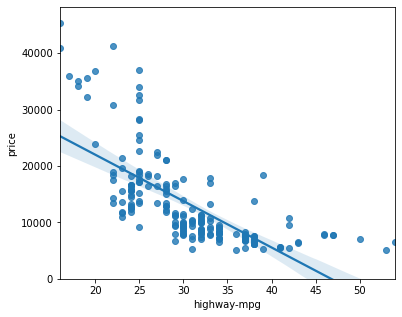

In [23]:
# highway-mpg as potential predictor variable of price
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

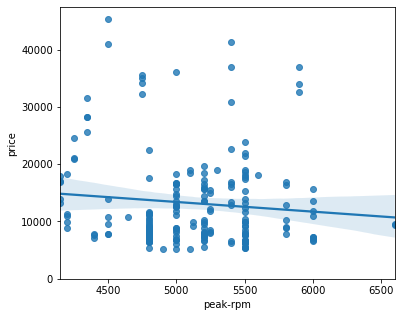

In [24]:
# peak-rpm as potential predictor variable of price
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [25]:
# The variable "highway-mpg" has a stronger correlation with "price", 
# it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. 

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#### Residual Plot (a scatter plot)
A good way to visualize the variance of the data is to use a residual plot.

/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


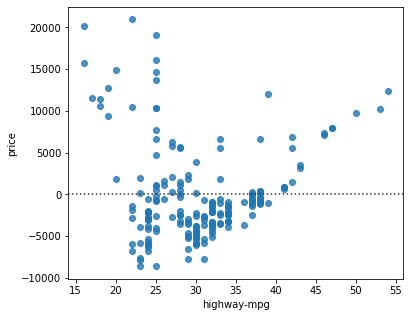

In [26]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

### Multiple Linear Regression
#### Distribution plot
To compare the distribution of the fitted values(result from the model) and the distribution of the actual values.

In [30]:
folder = '/Users/thiagocarvalho/Documents/databases/'
df = pd.read_csv(folder+'automobileEDA.csv')

In [31]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [33]:
# Fit the linear model using the four above-mentioned variables.
lm = LinearRegression()
lm.fit(Z, df['price'])

LinearRegression()

In [34]:
Y_hat = lm.predict(Z)

/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


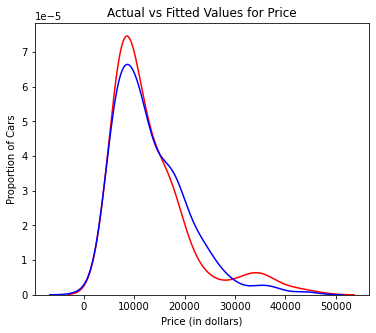

In [35]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynomial Regression 
A particular case of the general linear regression model or multiple linear regression models. Non-linear relationships are made by squaring or setting higher-order terms of the predictor variables. 

In [36]:
# Function to plot the data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [37]:
# Get the variables
x = df['highway-mpg']
y = df['price']

In [38]:
# Fit the polynomial using polyfit
f = np.polyfit(x, y, 3)

In [39]:
# Display the polynomial function using poly1d
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


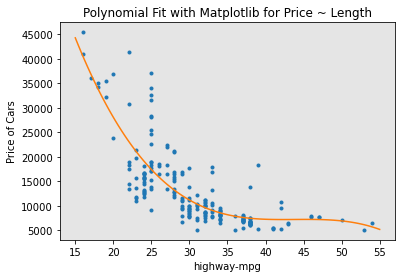

In [40]:
PlotPolly(p, x, y, 'highway-mpg')

In [41]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


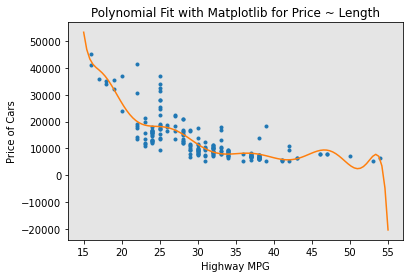

In [42]:
# Creatinf an 11 order polynomial model with the same variables x and y above
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

### Multivariate Polynomial function
performing a polynomial transform on multiple features

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
# Creating a PolynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [45]:
Z_pr=pr.fit_transform(Z)

In [46]:
Z.shape

(201, 4)

In [47]:
Z_pr.shape

(201, 15)

### Pipelines

Simplify the steps of processing the data. Is used to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [48]:
# Importing libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
# This pipeline normalize the data and perform a transform
Input=[('scale',StandardScaler()), \
       ('polynomial', PolynomialFeatures(include_bias=False)), \
       ('model',LinearRegression())]

In [50]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [51]:
# Pipeline + fit the model simultaneously
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [52]:
# Pipeline + produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [53]:
# Create a pipeline that Standardizes the data, then perform prediction 
# using a linear regression model using the features Z df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# and targets y df['price']

Input2=[('scale',StandardScaler()),('model',LinearRegression())]
pipe2=Pipeline(Input2)
pipe2.fit(Z,y)
ypipe2=pipe2.predict(Z)
ypipe[0:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

## Measures for In-Sample Evaluation
A quantitative measure to determine how accurate the model is.

R^2 /R squared --> coefficient of determination, indicates how close the data is to the fitted regression line.
It means the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE) --> measures the difference between actual value (y) and the estimated value (ŷ).

### Simple Linear Regression

#### Rˆ2 / R squared

In [54]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit"

In [55]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [56]:
from sklearn.metrics import mean_squared_error

#### MSE

In [57]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Multiple Linear Regression

#### Rˆ2 / R squared

In [58]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit"

In [59]:
Y_predict_multifit = lm.predict(Z)

#### MSE

In [60]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Polynomial Fit

#### Rˆ2 / R squared

In [61]:
from sklearn.metrics import r2_score

In [62]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


~ 67.419 % of the variation of price is explained by this polynomial fit

#### MSE

In [63]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## Prediction and Decision Making

### Prediction

In [64]:
# Importing libraries 
import matplotlib.pyplot as plt
import numpy as np

In [65]:
# Creating a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [66]:
# Fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [67]:
# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

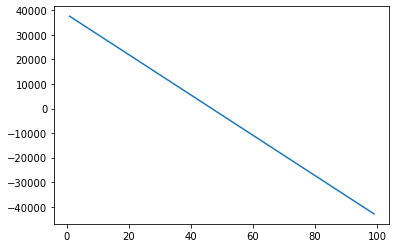

In [68]:
# plot the data
plt.plot(new_input, yhat)
plt.show()

### Decision Making: Determining a Good Model Fit

When comparing models:

    the model with the higher R-squared value is a better fit for the data
    the model with the smallest MSE value is a better fit for the data

# E | Model Evaluation and Refinement

### Setup

In [69]:
import pandas as pd
import numpy as np

In [70]:
#! pip install ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

#### Plot data funcions

In [71]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [72]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

#### Acquiring data

In [73]:
folder = '/Users/thiagocarvalho/Documents/databases/'
df2 = pd.read_csv(folder+'module_5_auto.csv')
df2.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,0,3,122,alfa-romero,std,two,convertible,rwd,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,1,3,122,alfa-romero,std,two,convertible,rwd,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,3,2,164,audi,std,four,sedan,fwd,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,4,2,164,audi,std,four,sedan,4wd,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Training and Testing
An important step in testing your model is to split your data into training and testing data. 

In [74]:
# Place the target data price in a separate dataframe y
y_data = df2['price']

In [75]:
# Drop price data in x data
x_data=df2.drop('price',axis=1)

In [76]:
# Randomly split our data into training and testing data using the function train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [77]:
# Import LinearRegression from the module linear_model
from sklearn.linear_model import LinearRegression

In [78]:
# Create a Linear Regression object
lre=LinearRegression()

In [79]:
# Fit the model using the feature horsepower
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [80]:
# Calculate the R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [81]:
# Calculate the R^2 on the train data. The R^2 is much smaller using the test data
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

#### Example: Find the R^2 on the test data using 40% of the data for training data

In [82]:
# Split up the data set such that 40% of the data samples will be utilized for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [83]:
lre.fit(x_train1[['horsepower']],y_train1)

LinearRegression()

In [84]:
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406974

### Cross Validation
If no sufficient testing data; perform Cross-validation.

In [85]:
# Import model_selection from the module cross_val_score
from sklearn.model_selection import cross_val_score

In [86]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

# input the object, the feature in this case ' horsepower', the target data (y_data).
# The parameter 'cv' determines the number of folds; in this case 4

In [87]:
# The default scoring is R^2; each element in the array has the average  R^2 value in the fold
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [88]:
# calculate the average and standard deviation of our estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [89]:
# use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014932,
       17561927.72247591])

#### Example: Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature

In [90]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [91]:
# Use the 'cross_val_predict' to predict the output. 
# The function splits up the data into the specified number of folds, using one fold for testing and the 
# other folds are used for training. First import the function:
from sklearn.model_selection import cross_val_predict

In [92]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Overfitting, Underfitting and Model Selection

In [93]:
# Create Multiple linear regression objects and train the model 
# using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' 
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [94]:
# Prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [95]:
# Prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

#### Let's perform some model evaluation using our training and testing data separately. 

In [96]:
# Import the seaborn and matplotlibb library for plotting.
import matplotlib.pyplot as plt
import seaborn as sns

/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


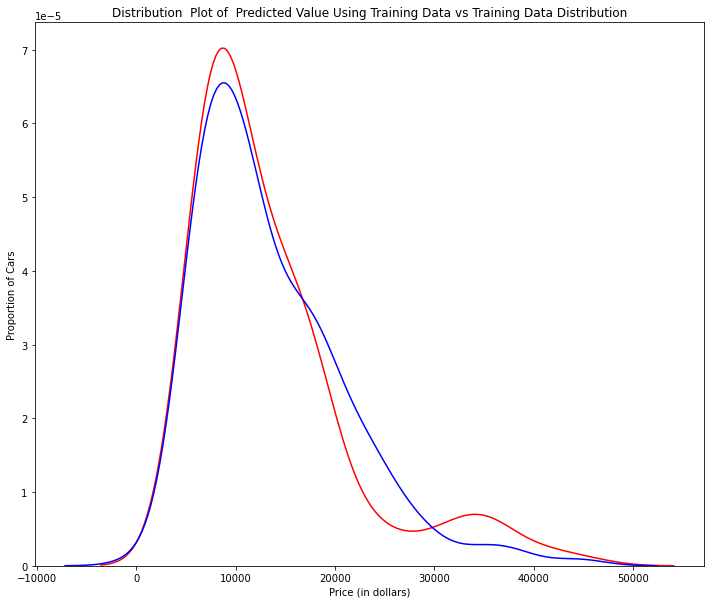

In [97]:
# Examine the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the training data. 


/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


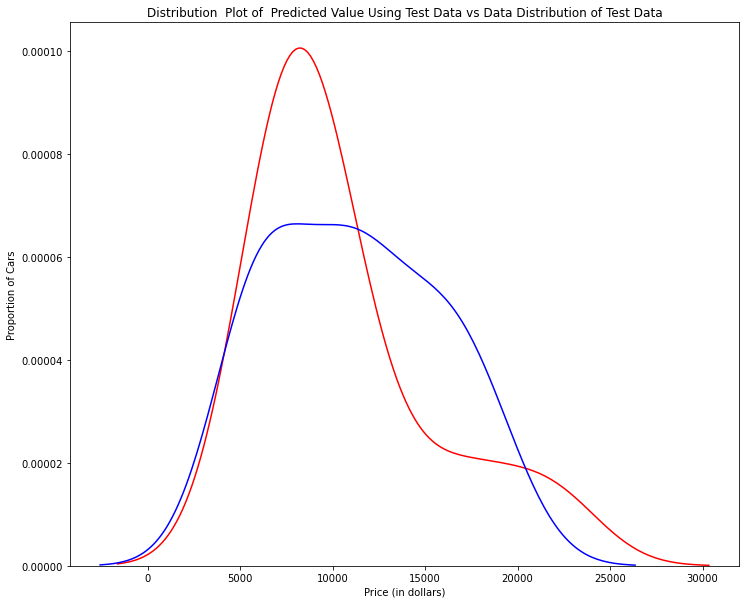

In [98]:
# So far the model seems to be doing well in learning from the training dataset. 
# But what happens when the model encounters new data from the testing dataset? 
# When the model generates new values from the test data, we see the distribution 
# of the predicted values is much different from the actual target values.
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figur 2: Plot of predicted value using the test data compared to the test data. 


--> Comparing Figure 1 and Figure 2
The distribution of the test data in Figure 1 is much better at fitting the data.

This difference in Figure 2 (from 5000 to 15 000) is where the distribution shape is exceptionally different.

In [99]:
from sklearn.preprocessing import PolynomialFeatures

#### Overfitting
The model fits the noise, not the underlying process

In [100]:
# Create a degree 5 polynomial transformation on the feature 'horse power' using 55% of the data for training:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [101]:
# create a linear regression model "poly" and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [102]:
#see the output of our model using the method "predict." then assign the values to "yhat"
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.60486749,  7307.93778255, 12213.74792967, 18893.34125061,
       19996.06555028])

In [103]:
# take the first five predicted values and compare it to the actual targets
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.60486749  7307.93778255 12213.74792967 18893.34125061]
True values: [ 6295. 10698. 13860. 13499.]


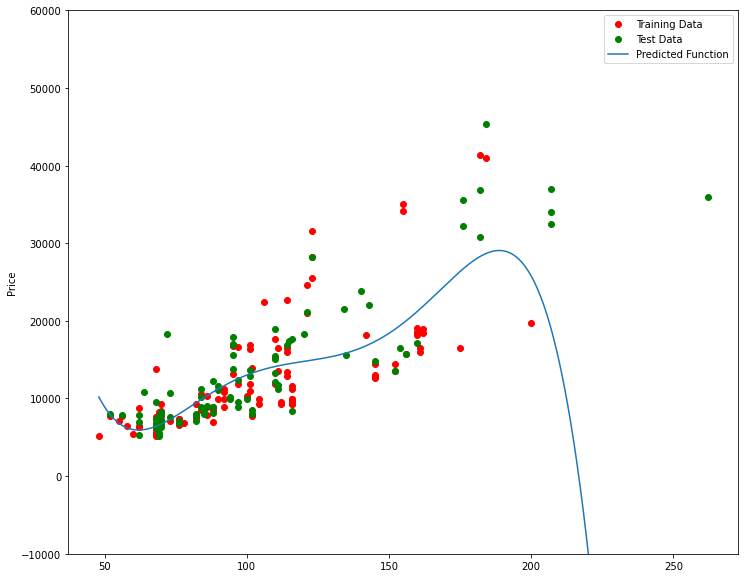

In [104]:
# display the training data, testing data, and the predicted function using the created function "PollyPlot".
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 


In [105]:
# R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716898927437

In [106]:
#R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.871035846525604

###### The R^2 for the training data is 0.5567   |   The R^2 on the test data was -29.87
The lower the R^2 --> the worse the model  | A Negative R^2 is a sign of overfitting

Text(3, 0.75, 'Maximum R^2 ')

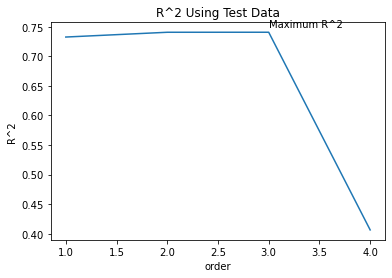

In [107]:
# R^2 changes on the test data for different order polynomials
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

==> R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four.


In [108]:
# function to experiment with different polynomial orders and different amounts of data
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [109]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [110]:
# Create a "PolynomialFeatures" object "pr1" of degree two 
pr1=PolynomialFeatures(degree=2)

In [111]:
# Transform the training and testing samples using fit_transform 
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [112]:
# Counting how many dimensions the new feature have using Shape
x_train_pr1.shape

(110, 15)

In [113]:
# Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features
poly1=LinearRegression().fit(x_train_pr1,y_train)

In [114]:
# Predict an output on the polynomial features 
yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


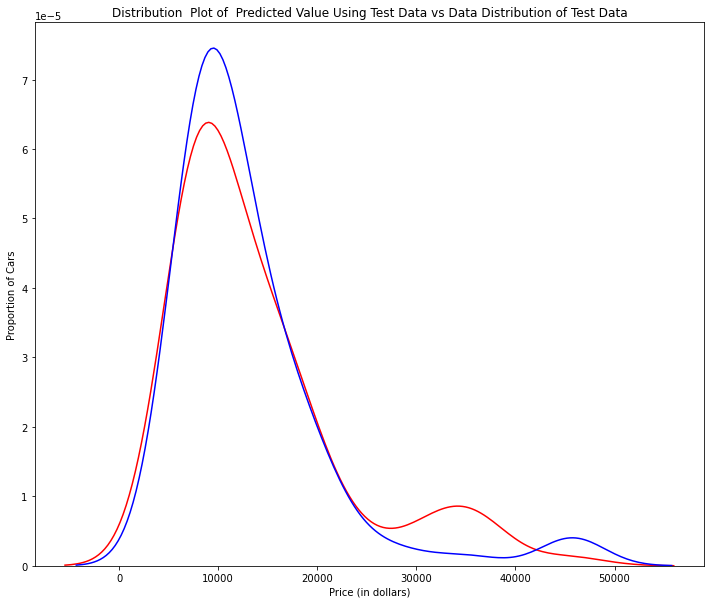

In [115]:
#display the distribution of the predicted output vs the test data
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted value is higher than actual value for cars where the price 10,000 range, conversely the predicted price is lower than the price cost in the 30,000 to 40,000 range. As such the model is not as accurate in these ranges. 

## Ridge regression

#Ridge Regression --> parameter Alfa changing the model. The test data will be used as validation data.

In [117]:
# A degree two polynomial transformation
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [118]:
# Import Ridge from the module linear models
from sklearn.linear_model import Ridge

In [119]:
# Setting the regularization parameter to 0.1
RigeModel=Ridge(alpha=0.1)

In [120]:
# Fit the model 
RigeModel.fit(x_train_pr, y_train)

/Users/thiagocarvalho/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

In [121]:
# Predict
yhat = RigeModel.predict(x_test_pr)

In [122]:
# Compare the first five predicted samples
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326844 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


In [123]:
# use a for loop to select the value of Alpha that minimizes the test error
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

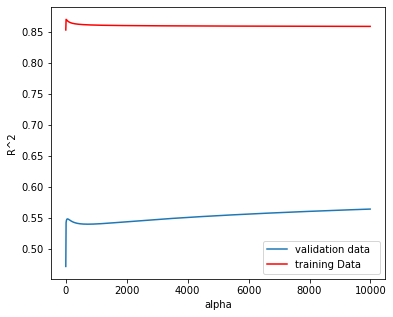

In [126]:
# Plot the value of R^2 for different Alphas
width = 6
height = 5
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The x-axis represents the different values of Alpha.

The R^2 of the validation data (blue line) --> As Alpha increases the R^2 increases and converges at a point

The R^2 of the training data (red line) --> As Alpha increases the R^2 decreases

In [127]:
# Ridge regression and calculate the R^2 using the polynomial features, and Alpha = 10
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440211109

## Grid Search

Alfa is a hyperparameter. 

Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [128]:
# import GridSearchCV from the module model_selection.
from sklearn.model_selection import GridSearchCV

In [129]:
# create a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [130]:
# create a ridge regions object
RR=Ridge()
RR

Ridge()

In [131]:
# Create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [132]:
# Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [133]:
# Find the best parameter values on the validation data assigning to the BestRR variable
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [134]:
# test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.841164983103615

In [135]:
#  A grid search for the alpha parameter and the normalization parameter 
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, normalize=True)